**exercises with statsmodels OLS and WLS**



In [23]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf


puidata = os.getenv('PUIDATA')

In [6]:
# download the matplotlib library file from Professor Bianco's repo
! curl -O https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/fbb_matplotlibrc.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   397  100   397    0     0   3532      0 --:--:-- --:--:-- --:--:--  3544


In [ ]:
directory = os.getcwd()

s = json.load( open(directory+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

In [83]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

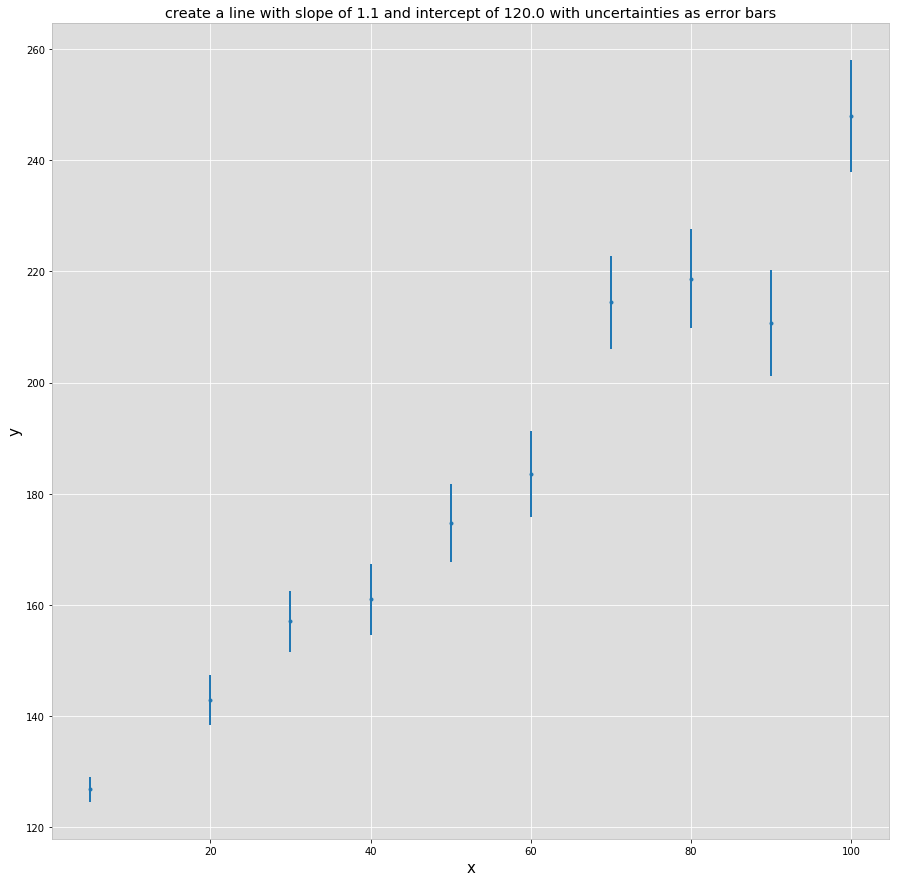

In [88]:
np.random.seed(66)

a = 1.1
x = np.array([5.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0])
y = line(a,x,b,errors)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

ax.errorbar(x,y,yerr = errors(x),fmt = '.')
ax.set_xlabel('x',fontsize = 15)
ax.set_ylabel('y',fontsize = 15)
ax.set_title(r'create a line with slope of {} and intercept of {} with uncertainties as error bars'.format(a,b))
plt.show()

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [67]:
print(y)

[   6.84169516   22.90218536   37.04741547   40.99774548   54.71907234
   63.55414075   94.40457579   98.66961278   90.75082871  127.93342095]


In [68]:
print(x)

[   5.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [70]:
#THE WRONG WAY
modwrong = smf.OLS(y, x).fit()
modwrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     788.8
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           4.47e-10
Time:                        09:00:23   Log-Likelihood:                -34.728
No. Observations:                  10   AIC:                             71.46
Df Residuals:                       9   BIC:                             71.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.1778      0.042     28.086      0.000         1.083     1.273
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   2.525
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.179
Skew:                          -0.130   Prob(JB):                        0.915
Kurtosis:                       2.399   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#THE RIGHT WAY
mod = sm.OLS(y,sm.add_constant(x)).fit()
mod.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     168.1
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           1.19e-06
Time:                        09:01:18   Log-Likelihood:                -34.668
No. Observations:                  10   AIC:                             73.34
Df Residuals:                       8   BIC:                             73.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.7889      5.752     -0.311      0.764       -15.053    11.475
x1             1.2031      0.093     12.966      0.000         0.989     1.417
==============================================================================
Omnibus:                        0.597   Durbin-Watson:                   2.549
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.309
Skew:                          -0.378   Prob(JB):                        0.857
Kurtosis:                       2.587   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

** I believe the different is smf.ols model intercept is fitted and in the sm.ols model, it will you show intercept as one of the constant, Which in most of the case, sm.ols can provide a better model **

# 4. plot the data (as points) and both statsmodels fits

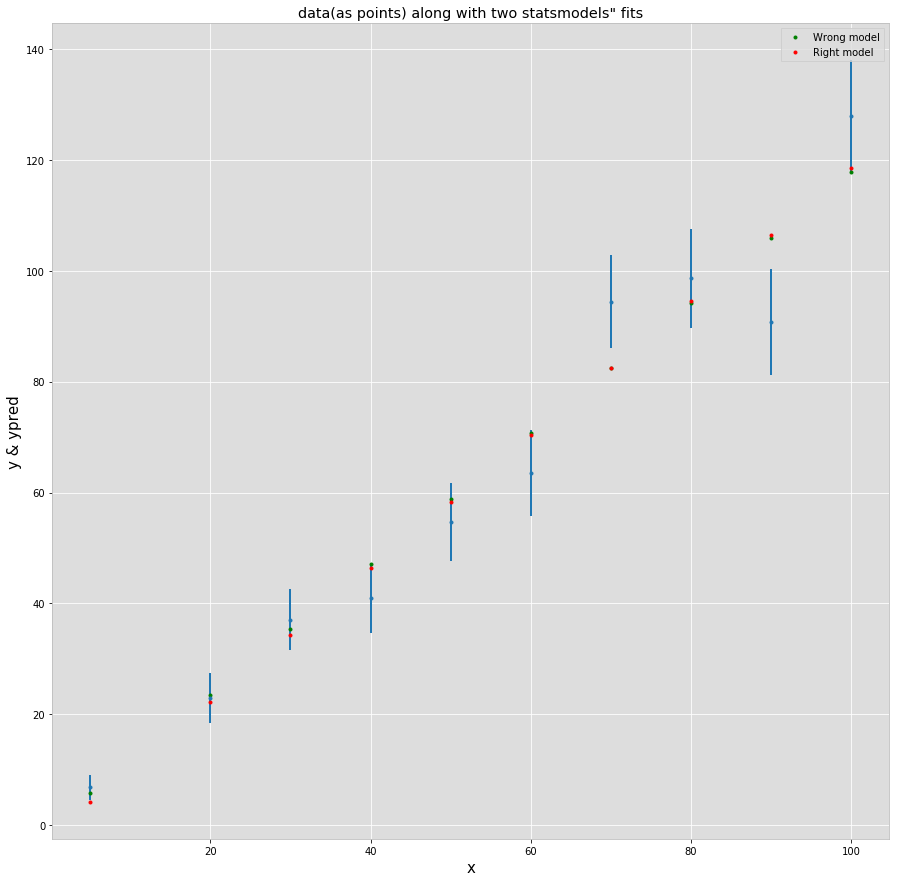

In [80]:
fig = plt.figure(figsize = (15,15))
ax  = fig.add_subplot(111)

ax.errorbar(x,y,yerr = errors(x),fmt = '.')
ax.plot(x,modwrong.predict(),'g.',label = 'Wrong model')
ax.plot(x,mod.predict(),'r.',label = 'Right model')
ax.legend()
ax.set_xlabel('x',fontsize = 15)
ax.set_ylabel('y & ypred',fontsize = 15)
ax.set_title(r'data(as points) along with two statsmodels" fits')
plt.show()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [102]:
a = 0.6
b = 120*a
y = line(a,x,b,errors)


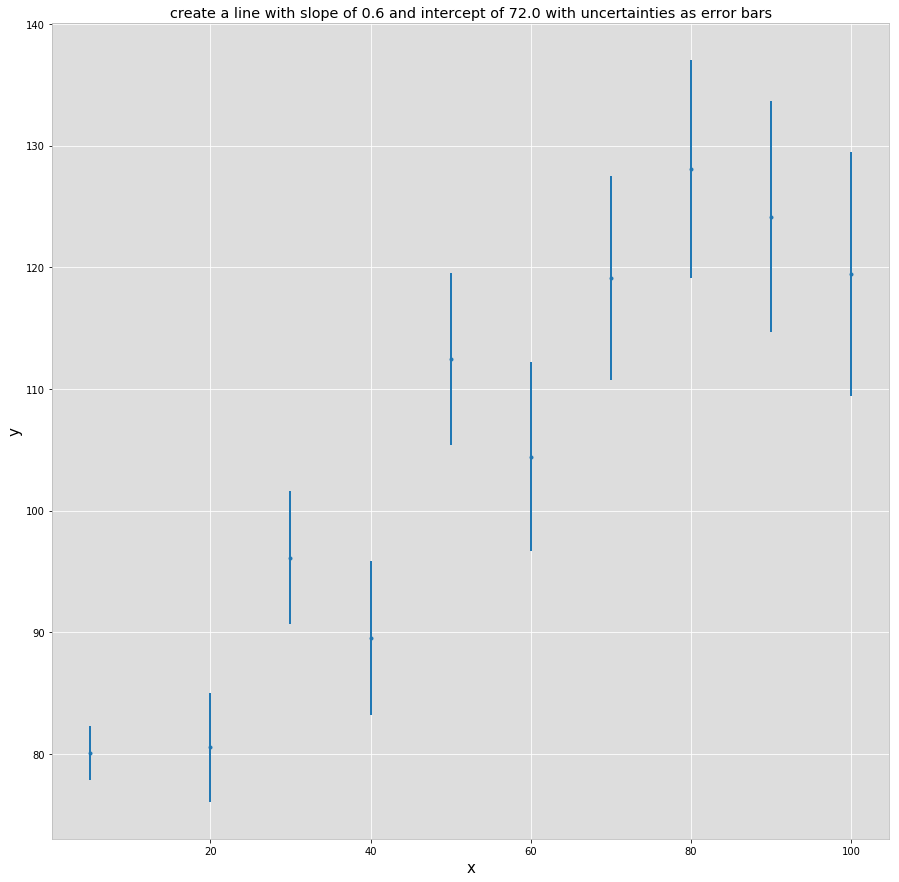

In [103]:
fig = plt.figure(figsize = (15,15))
ax  = fig.add_subplot(111)

ax.errorbar(x,y,yerr = errors(x),fmt = '.')
ax.set_xlabel('x',fontsize = 15)
ax.set_ylabel('y',fontsize = 15)
ax.set_title(r'create a line with slope of {} and intercept of {} with uncertainties as error bars'.format(a,b))
plt.show()


# 6. repeat step 3

In [104]:
#THE WRONG WAY
modwrong = smf.OLS(y, x).fit()
modwrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     65.77
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           1.98e-05
Time:                        09:26:24   Log-Likelihood:                -50.308
No. Observations:                  10   AIC:                             102.6
Df Residuals:                       9   BIC:                             102.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.6151      0.199      8.110      0.000         1.165     2.066
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.285
Skew:                          -0.149   Prob(JB):                        0.867
Kurtosis:                       2.228   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# right way
mod = sm.OLS(y,sm.add_constant(x)).fit()
mod.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     44.21
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           0.000161
Time:                        09:26:40   Log-Likelihood:                -33.160
No. Observations:                  10   AIC:                             70.32
Df Residuals:                       8   BIC:                             70.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         76.4642      4.947     15.457      0.000        65.057    87.871
x1             0.5306      0.080      6.649      0.000         0.347     0.715
==============================================================================
Omnibus:                        1.537   Durbin-Watson:                   2.427
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                0.742
Skew:                          -0.031   Prob(JB):                        0.690
Kurtosis:                       1.667   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

** now, we can see the right model have the first constant will be intercept with some error. and x1 coef will be the slope with some error. but the wrong model might be the generalized with intercept and slope **

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [107]:
modW = sm.WLS(y,sm.add_constant(x)).fit()
modW.summary()


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            WLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     44.21
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           0.000161
Time:                        09:26:53   Log-Likelihood:                -33.160
No. Observations:                  10   AIC:                             70.32
Df Residuals:                       8   BIC:                             70.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         76.4642      4.947     15.457      0.000        65.057    87.871
x1             0.5306      0.080      6.649      0.000         0.347     0.715
==============================================================================
Omnibus:                        1.537   Durbin-Watson:                   2.427
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                0.742
Skew:                          -0.031   Prob(JB):                        0.690
Kurtosis:                       1.667   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.75e-06
Time:                        12:14:01   Log-Likelihood:                -29.722
No. Observations:                  10   AIC:                             63.44
Df Residuals:                       8   BIC:                             64.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5287      2.356     30.781      0.000      67.095      77.962
x1             0.6314      0.054     11.612      0.000       0.506       0.757
==============================================================================
Omnibus:                        1.226   Durbin-Watson:                   2.491
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.720
Skew:                           0.203   Prob(JB):                        0.698
Kurtosis:                       1.750   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

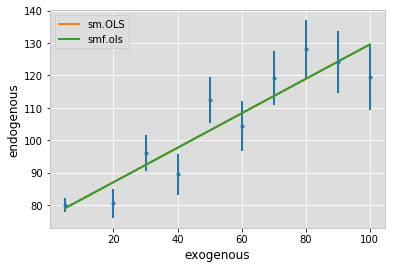

In [108]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, modW.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

** I notices that if we use smf.ols, I need to build a formula 'y~x+const' to build the model. in this case I prefer sm.ols from statsmodels.api **